In [1]:
# import required libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Dropout 
from tensorflow.keras.models import Model

In [2]:
# check if GPU is available
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# import cifar data
cifar = tf.keras.datasets.cifar10

cifar_data = cifar.load_data()
(x_train, y_train), (x_test, y_test) = cifar_data
print("Train data shape: ", x_train.shape)

170498071/170498071 [==============================] - 22s 0us/step
Train data shape:  (50000, 32, 32, 3)


In [7]:
# find number of classes
k = np.unique(y_train).shape[0]
print("Number of classes: ", k)

Number of classes:  10


In [8]:
# build model
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=3, strides=2, activation="relu")(i)
x = Conv2D(filters=64, kernel_size=3, strides=2, activation="relu")(x)
x = Conv2D(filters=128, kernel_size=3, strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(k, activation="softmax")(x)

model = Model(inputs=i, outputs=x)

In [9]:
# compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
# fit model 
r = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 11s 4ms/step - loss: 1.7985 - accuracy: 0.3554 - val_loss: 1.6675 - val_accuracy: 0.4019
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5269 - accuracy: 0.4498 - val_loss: 1.4471 - val_accuracy: 0.4764
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4217 - accuracy: 0.4895 - val_loss: 1.3335 - val_accuracy: 0.5166
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3463 - accuracy: 0.5164 - val_loss: 1.2596 - val_accuracy: 0.5528
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2906 - accuracy: 0.5384 - val_loss: 1.1988 - val_accuracy: 0.5768
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2438 - accuracy: 0.5583 - val_loss: 1.1769 - val_accuracy: 0.5866
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2041 - accuracy: 0.5745 - val_loss: 1.1944 - val_accuracy

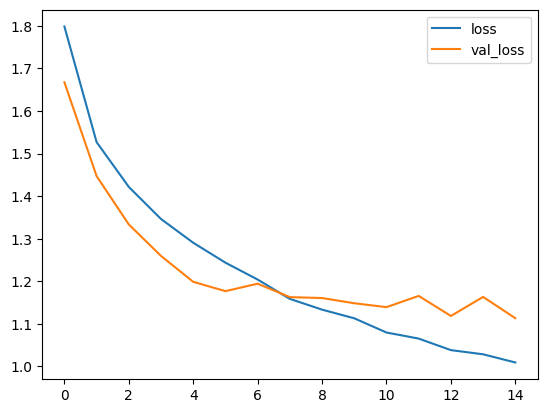

In [11]:
# plot loss per epoch
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

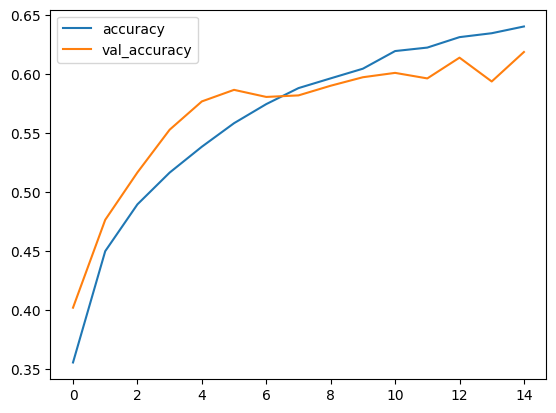

In [12]:
# plot accuracy per epoch
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()